# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
# To filter the warnings
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split


# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import (
    accuracy_score,
    roc_curve,
    confusion_matrix,
    roc_auc_score,
    f1_score,
    recall_score,
    precision_score,
    plot_confusion_matrix,
    precision_recall_curve,
)

import math

# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To build model for Decision Tree prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [2]:
data = pd.read_csv("INNHotelsGroup.csv")

<IPython.core.display.Javascript object>

In [3]:
np.random.seed(1)
data.sample(n=10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
30392,INN30393,1,0,1,0,Not Selected,0,Room_Type 1,53,2018,9,11,Online,0,0,0,94.32000,0,Not_Canceled
6685,INN06686,2,0,1,2,Meal Plan 1,0,Room_Type 1,63,2018,4,22,Online,0,0,0,105.30000,1,Canceled
8369,INN08370,2,0,2,3,Meal Plan 1,0,Room_Type 4,55,2018,9,11,Online,0,0,0,106.24000,0,Not_Canceled
2055,INN02056,2,0,0,2,Not Selected,0,Room_Type 1,53,2017,12,29,Online,0,0,0,81.00000,1,Not_Canceled
10969,INN10970,1,0,2,4,Meal Plan 1,0,Room_Type 1,245,2018,7,6,Offline,0,0,0,110.00000,0,Canceled
24881,INN24882,2,0,3,7,Meal Plan 1,0,Room_Type 2,231,2018,8,1,Online,0,0,0,81.82000,2,Canceled
28658,INN28659,2,0,0,3,Meal Plan 2,0,Room_Type 1,71,2018,5,10,Offline,0,0,0,126.00000,1,Not_Canceled
20853,INN20854,2,0,1,2,Meal Plan 1,0,Room_Type 1,66,2017,10,9,Offline,0,0,0,75.00000,0,Canceled
8501,INN08502,2,0,0,3,Meal Plan 1,0,Room_Type 2,40,2018,1,14,Online,0,0,0,77.55000,1,Not_Canceled
1942,INN01943,2,0,0,2,Meal Plan 1,0,Room_Type 1,63,2018,8,9,Online,0,0,0,144.90000,2,Not_Canceled


<IPython.core.display.Javascript object>

In [4]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Booking_ID,36275,36275,INN00001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_adults,36275.00000,NaN,NaN,NaN,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,NaN,NaN,NaN,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,NaN,NaN,NaN,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,NaN,NaN,NaN,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
type_of_meal_plan,36275,4,Meal Plan 1,27835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
required_car_parking_space,36275.00000,NaN,NaN,NaN,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
room_type_reserved,36275,7,Room_Type 1,28130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_time,36275.00000,NaN,NaN,NaN,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,NaN,NaN,NaN,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000


<IPython.core.display.Javascript object>

In [5]:
data.shape

(36275, 19)

<IPython.core.display.Javascript object>

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

<IPython.core.display.Javascript object>

In [7]:
# checking for null values
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

<IPython.core.display.Javascript object>

In [8]:
# checking for duplicate values
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [9]:
cols = [
    "type_of_meal_plan",
    "room_type_reserved",
    "market_segment_type",
    "booking_status",
]
for col in cols:
    print(data.value_counts(col))
    print("")

type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
dtype: int64

room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
dtype: int64

market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
dtype: int64

booking_status
Not_Canceled    24390
Canceled        11885
dtype: int64



<IPython.core.display.Javascript object>

##### Observations:

- We likely should remove the Booking_ID column because it has a unique value in each row would contribute anything to modeling.
- We likely can remove the arrival_date column because cancelation decisions likely don't depend on the actual day. Also, we already have arrival_year to track as a time-related variable.
- It probably makes sense to convert arrival_month into a categorical column, because month will track seasonal behavior. And we already have arrival_year to track as a time-related variable.
- The repeated_guest column and required_car_parking_space are currently integer types, but should get converted into categorical variable types
- No duplicate rows and no null values. This is a pretty clean data set.
- Most of the values in type_of_meal_plan include "Meal Plan", and all the values in room_type_reserved include "Room_Type". We can make this look a little more tidy by removing that text and only including the numbers (or "Not Selected") in the values.
- It may be valuable to update the arrival_year column to a years_since_arrival column (e.g. output "5" if arrival_year is 2017 because 2022-2017 is 5). This will make the numerical value match the linear variability.
- repeated_guest is a categorical column that has values of 0 and 1. We should update those to Yes and No.

We will first do some Exploratory Data Analysis before data cleaning.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

Creating a couple functions to help with data visualization:

In [10]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [11]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [12]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

In [13]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

##### 1. What are the busiest months in the hotel?

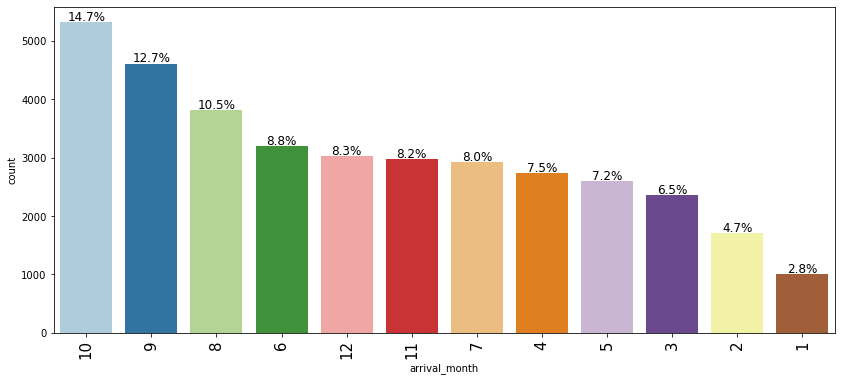

<IPython.core.display.Javascript object>

In [14]:
labeled_barplot(data, "arrival_month", perc=True)

October (10) and September (9) are the busiest months in the hotel.

##### 2. Which market segment do most of the guests come from?

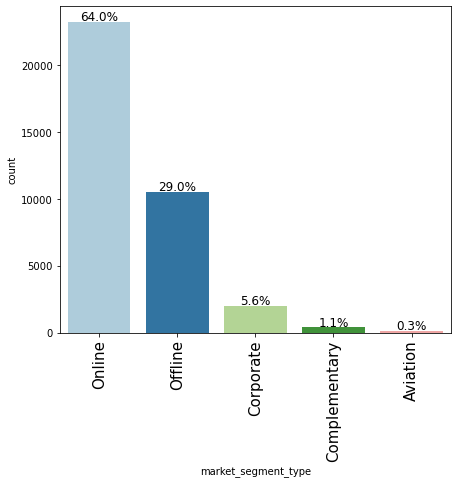

<IPython.core.display.Javascript object>

In [15]:
labeled_barplot(data, "market_segment_type", perc=True)

Online segments compose the majority of the data set: specifically, 64%. Offline segments are the second most, with 29%.
Corporate, Complementary, and Aviation have a combined percentage of about 7%. These market segments were all likely offered for free to those customers, so canceling those and rebooking with a paying customers actually results in more revenue for the company.

##### 3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

<AxesSubplot:xlabel='market_segment_type', ylabel='avg_price_per_room'>

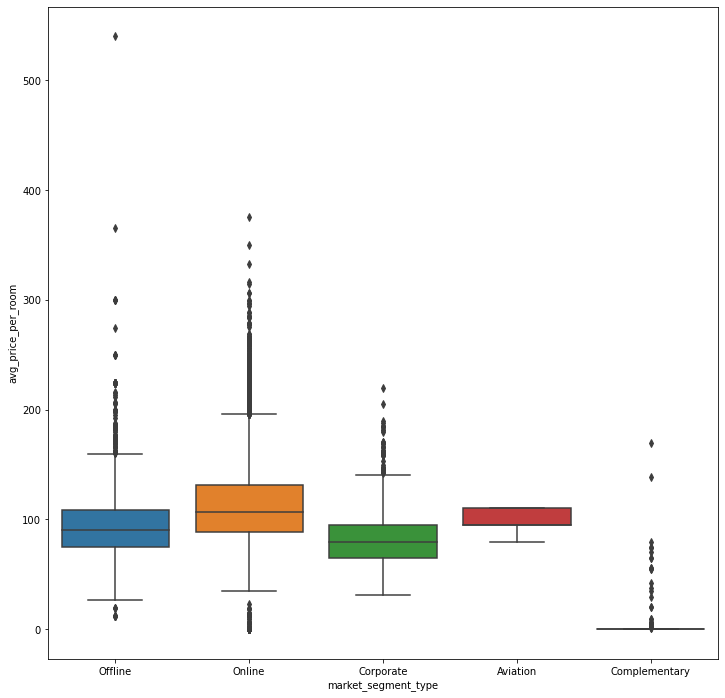

<IPython.core.display.Javascript object>

In [16]:
plt.figure(figsize=(12, 12))
sns.boxplot(data=data, x="market_segment_type", y="avg_price_per_room")

First off, there are a good number of outliers here so it might be worth some outlier treatment.

Generally, online bookings cost the most. This probably makes sense because there are typically online processing fees included in the cost.

Aviation market segment has a very small range, likely because those are popular with pilots or flight attendants that have fixed deals with hotel stays.

Online, offline, and corporate market segments have wide range in pricing. This is likely because there is a lot of variability at play (e.g. number of people in party, length of stay).

It is odd that there are a couple rows that are in the Complementary segment with a nonzero price. This is probably bad data, so we should replace the avg_price_per_room value for each of these rows with "0".

##### 4. What percentage of bookings are canceled?

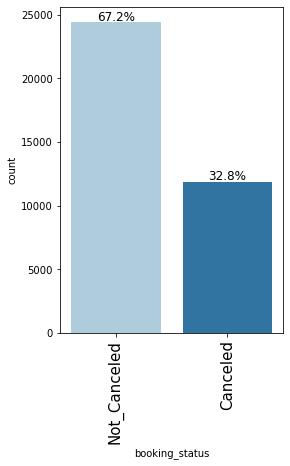

<IPython.core.display.Javascript object>

In [17]:
labeled_barplot(data, "booking_status", perc=True)

32.8%, or almost one-third, of all bookings are canceled.

This especially sheds light on the importance of handling cancelations as they happen pretty often.

##### 5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


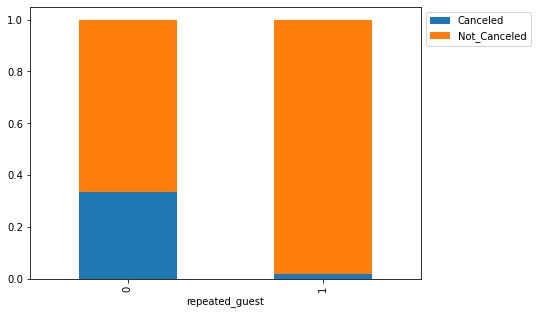

<IPython.core.display.Javascript object>

In [18]:
stacked_barplot(data, "repeated_guest", "booking_status")

Repeated guests are less likely to cancel compared to general guests. This is reassuring - the frequent guests of the hotel are also loyal guests, so continuing to treat them well pays off.

##### 6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11885         24390  36275
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
------------------------------------------------------------------------------------------------------------------------


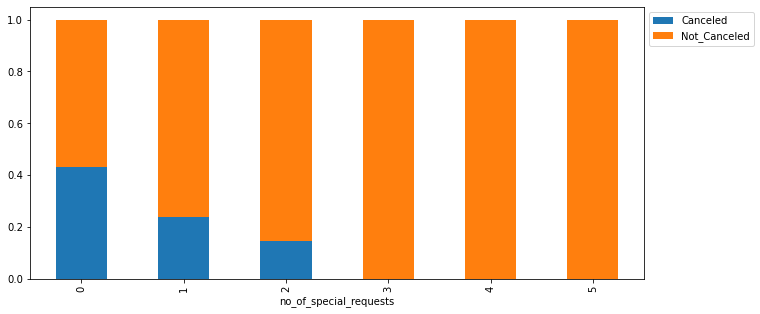

<IPython.core.display.Javascript object>

In [19]:
stacked_barplot(data, "no_of_special_requests", "booking_status")

Guests with more special requests are less likely to cancel. This is likely because guests with special requests have less options for hotels and go through a large amount of effort that find hotels that can accomodate their needs.

#### Additional Questions On My Mind

##### Does the size of the party affect booking cancelation status?

booking_status  Canceled  Not_Canceled    All
no_of_adults                                 
All                11885         24390  36275
2                   9119         16989  26108
1                   1856          5839   7695
3                    863          1454   2317
0                     44            95    139
4                      3            13     16
------------------------------------------------------------------------------------------------------------------------


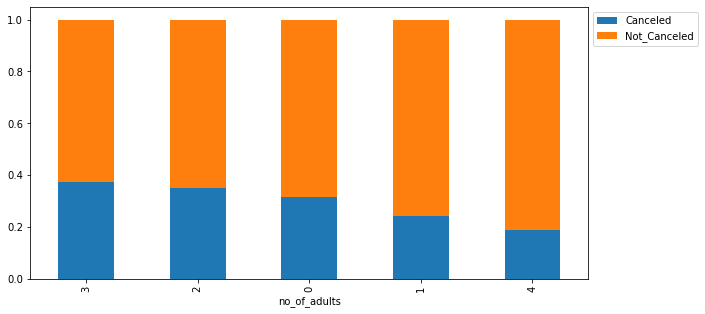

<IPython.core.display.Javascript object>

In [20]:
stacked_barplot(data, "no_of_adults", "booking_status")

booking_status  Canceled  Not_Canceled    All
no_of_children                               
All                11885         24390  36275
0                  10882         22695  33577
1                    540          1078   1618
2                    457           601   1058
3                      5            14     19
9                      1             1      2
10                     0             1      1
------------------------------------------------------------------------------------------------------------------------


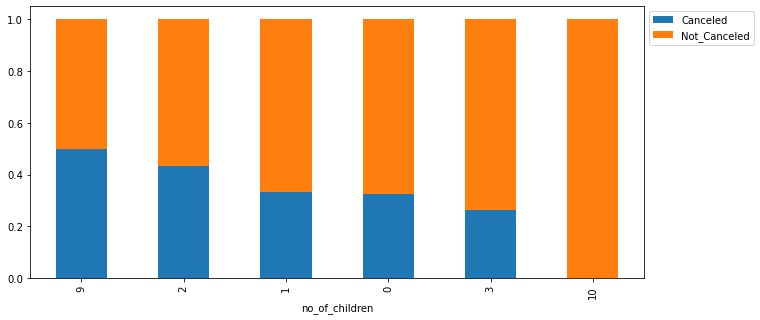

<IPython.core.display.Javascript object>

In [21]:
stacked_barplot(data, "no_of_children", "booking_status")

There appears to be no correlation between size of party and cancelation status.

##### Is there a correlation between length of stay in the hotel and cancelation status?

booking_status        Canceled  Not_Canceled    All
no_of_weekend_nights                               
All                      11885         24390  36275
0                         5093         11779  16872
1                         3432          6563   9995
2                         3157          5914   9071
4                           83            46    129
3                           74            79    153
5                           29             5     34
6                           16             4     20
7                            1             0      1
------------------------------------------------------------------------------------------------------------------------


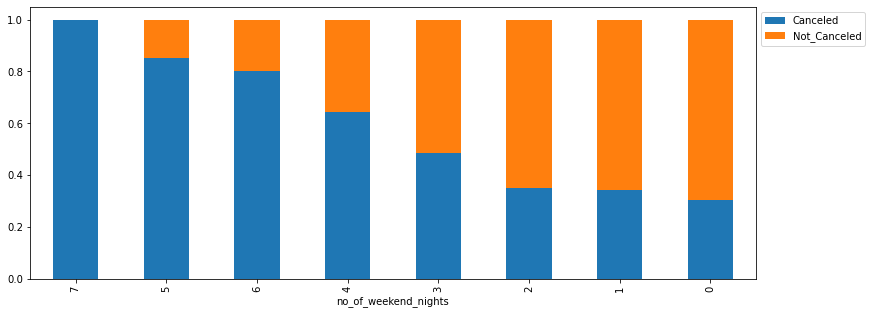

<IPython.core.display.Javascript object>

In [22]:
stacked_barplot(data, "no_of_weekend_nights", "booking_status")

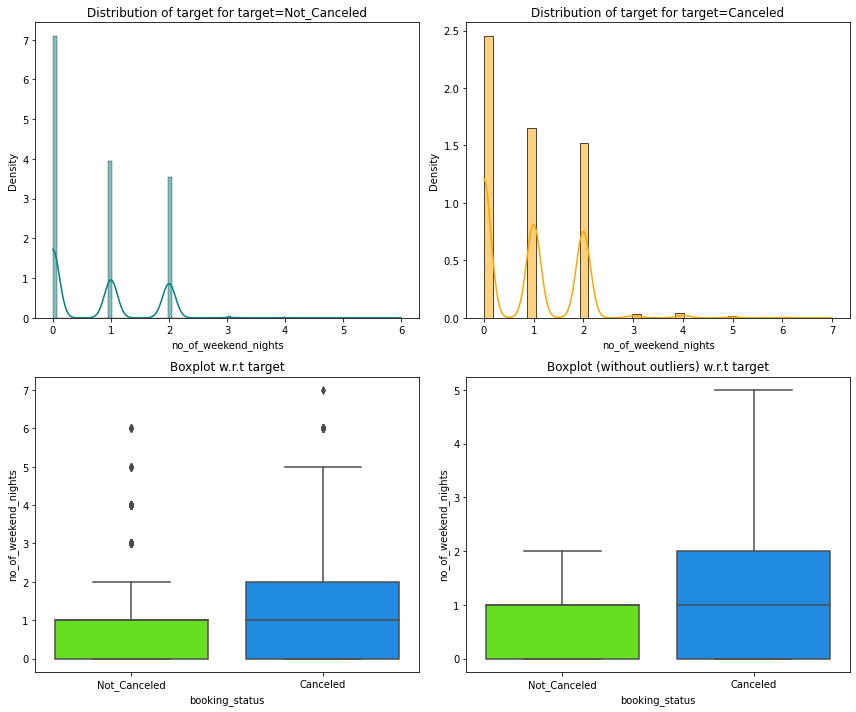

<IPython.core.display.Javascript object>

In [23]:
distribution_plot_wrt_target(data, "no_of_weekend_nights", "booking_status")

booking_status     Canceled  Not_Canceled    All
no_of_week_nights                               
All                   11885         24390  36275
2                      3997          7447  11444
3                      2574          5265   7839
1                      2572          6916   9488
4                      1143          1847   2990
0                       679          1708   2387
5                       632           982   1614
6                        88           101    189
10                       53             9     62
7                        52            61    113
8                        32            30     62
9                        21            13     34
11                       14             3     17
15                        8             2     10
12                        7             2      9
13                        5             0      5
14                        4             3      7
16                        2             0      2
17                  

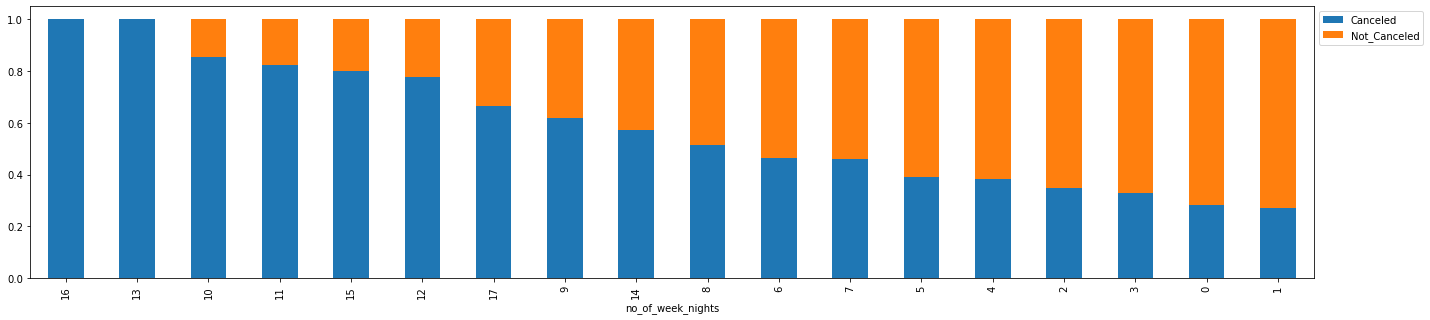

<IPython.core.display.Javascript object>

In [24]:
stacked_barplot(data, "no_of_week_nights", "booking_status")

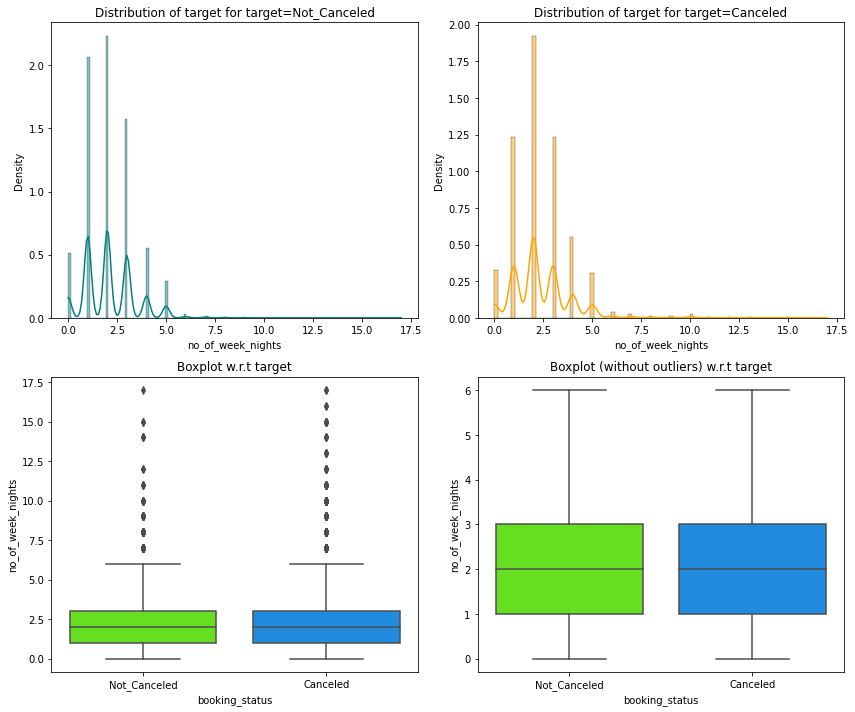

<IPython.core.display.Javascript object>

In [25]:
distribution_plot_wrt_target(data, "no_of_week_nights", "booking_status")

Generally, a cancelation is more likely to occur if the length of stay is higher. This is true for both week nights and weekend nights. 

##### Are guests more likely to cancel if they had prior behaviors of canceling?

booking_status                Canceled  Not_Canceled    All
no_of_previous_cancellations                               
All                              11885         24390  36275
0                                11869         24068  35937
1                                   11           187    198
13                                   4             0      4
3                                    1            42     43
2                                    0            46     46
4                                    0            10     10
5                                    0            11     11
6                                    0             1      1
11                                   0            25     25
------------------------------------------------------------------------------------------------------------------------


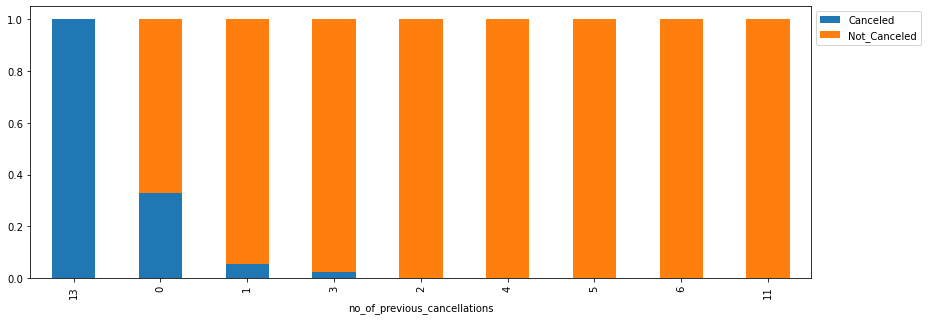

<IPython.core.display.Javascript object>

In [26]:
stacked_barplot(data, "no_of_previous_cancellations", "booking_status")

booking_status                        Canceled  Not_Canceled    All
no_of_previous_bookings_not_canceled                               
All                                      11885         24390  36275
0                                        11878         23585  35463
1                                            4           224    228
12                                           1            11     12
4                                            1            64     65
6                                            1            35     36
2                                            0           112    112
44                                           0             2      2
43                                           0             1      1
42                                           0             1      1
41                                           0             1      1
40                                           0             1      1
38                                           0  

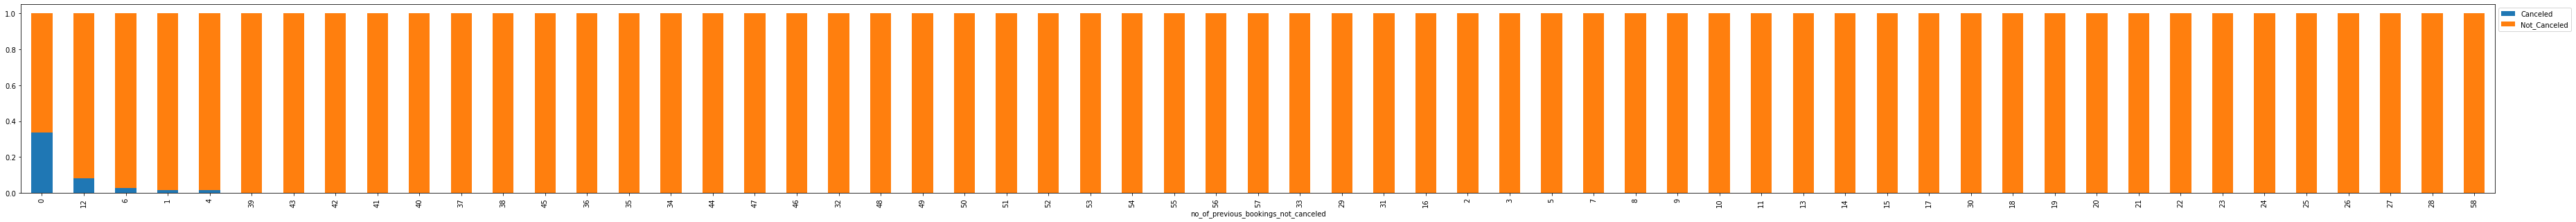

<IPython.core.display.Javascript object>

In [27]:
stacked_barplot(data, "no_of_previous_bookings_not_canceled", "booking_status")

If a guest did not cancel a prior booking, they are likely to also not cancel a subsequent one. 
However, there is no apparent correlation for likelihood of cancelation based on the number of prior canceled bookings.

##### Are bookings made well in advance more likely to cancel?

<AxesSubplot:xlabel='lead_time', ylabel='Count'>

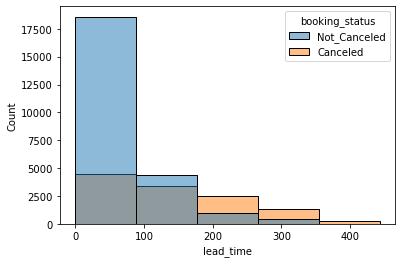

<IPython.core.display.Javascript object>

In [28]:
sns.histplot(data, x="lead_time", hue="booking_status", bins=5)

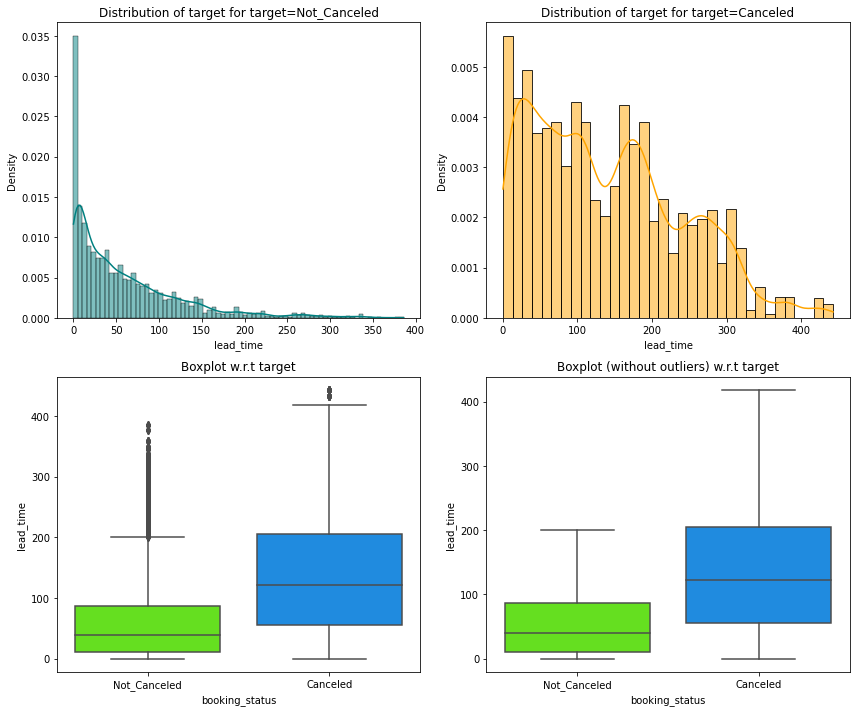

<IPython.core.display.Javascript object>

In [29]:
distribution_plot_wrt_target(data, "lead_time", "booking_status")

As a booking is made further in advance, it is more likely to cancel. This is likely because customers may forget about their booking if done too far in advance. The company can likely benefit from contacting the customers again when there are 100 days until the stay to confirm whether or not they want to keep the reservation.

##### Will guests be more likely to stay if they also need a parking space?

booking_status              Canceled  Not_Canceled    All
required_car_parking_space                               
All                            11885         24390  36275
0                              11771         23380  35151
1                                114          1010   1124
------------------------------------------------------------------------------------------------------------------------


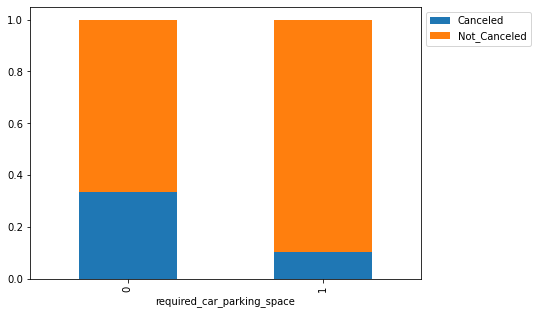

<IPython.core.display.Javascript object>

In [30]:
stacked_barplot(data, "required_car_parking_space", "booking_status")

Generally, those that didn't get a parking space were more likely to cancel. This is likely because when people book parking spots, they are more solidified with their plans.

##### Will guests be more likely to keep the reservation if they have a meal plan?

booking_status     Canceled  Not_Canceled    All
type_of_meal_plan                               
All                   11885         24390  36275
Meal Plan 1            8679         19156  27835
Not Selected           1699          3431   5130
Meal Plan 2            1506          1799   3305
Meal Plan 3               1             4      5
------------------------------------------------------------------------------------------------------------------------


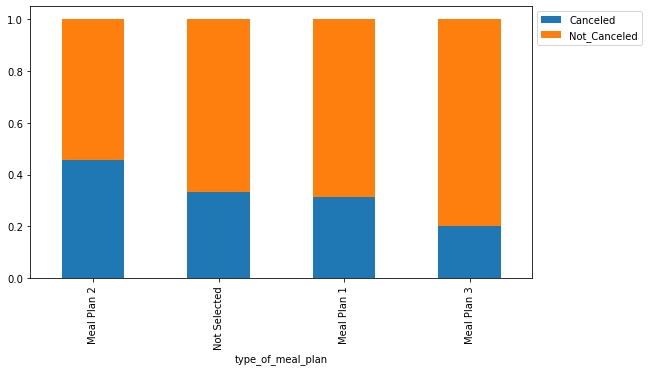

<IPython.core.display.Javascript object>

In [31]:
stacked_barplot(data, "type_of_meal_plan", "booking_status")

There is no clear correlation between meal plan and if the booking was canceled.

Generally, guests that require a car parking space don't cancel as much as guests that don't require a car parking space. 

In [32]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


<IPython.core.display.Javascript object>

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

Let's make the data cleaning suggestions as described earlier.

In [33]:
# First, confirm that Booking_ID actually is unique
data.Booking_ID.nunique()

36275

<IPython.core.display.Javascript object>

In [34]:
# Remove Booking_ID
data = data.drop(["Booking_ID"], axis=1)

# Remove arrival_date
data = data.drop(["arrival_date"], axis=1)

# Convert repeated_guest and required_car_parking_space to categorical variable types
data["repeated_guest"] = data["repeated_guest"].astype("category")
data["required_car_parking_space"] = data["required_car_parking_space"].astype(
    "category"
)

# Remove "Room_Type" from room_type_reserved column
data["room_type_reserved"] = data["room_type_reserved"].str.replace("Room_Type ", "")

# Remove "Meal Plan" from type_of_meal_plan column
data["type_of_meal_plan"] = data["type_of_meal_plan"].str.replace("Meal Plan ", "")

# Convert the arrival_year column to a years_since_arrival column
data["years_since_arrival"] = 2022 - data["arrival_year"]
data.drop("arrival_year", inplace=True, axis=1)

# Update repeated_guest column from 1 and 0 to Yes and No, respectively
data["repeated_guest"] = data["repeated_guest"].replace(1, "Yes")
data["repeated_guest"] = data["repeated_guest"].replace(0, "No")

<IPython.core.display.Javascript object>

In [35]:
# Update arrival_month column from numbers to abbreviated month names

months = [
    "Jan",
    "Feb",
    "Mar",
    "Apr",
    "May",
    "Jun",
    "Jul",
    "Aug",
    "Sep",
    "Oct",
    "Nov",
    "Dec",
]
for i in np.arange(1, 13, 1):
    data["arrival_month"] = data["arrival_month"].replace(i, months[i - 1])

data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,years_since_arrival
0,2,0,1,2,1,0,1,224,Oct,Offline,No,0,0,65.00000,0,Not_Canceled,5
1,2,0,2,3,Not Selected,0,1,5,Nov,Online,No,0,0,106.68000,1,Not_Canceled,4
2,1,0,2,1,1,0,1,1,Feb,Online,No,0,0,60.00000,0,Canceled,4
3,2,0,0,2,1,0,1,211,May,Online,No,0,0,100.00000,0,Canceled,4
4,2,0,1,1,Not Selected,0,1,48,Apr,Online,No,0,0,94.50000,0,Canceled,4


<IPython.core.display.Javascript object>

Let's confirm this data looks like what we expect.

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          36275 non-null  int64   
 1   no_of_children                        36275 non-null  int64   
 2   no_of_weekend_nights                  36275 non-null  int64   
 3   no_of_week_nights                     36275 non-null  int64   
 4   type_of_meal_plan                     36275 non-null  object  
 5   required_car_parking_space            36275 non-null  category
 6   room_type_reserved                    36275 non-null  object  
 7   lead_time                             36275 non-null  int64   
 8   arrival_month                         36275 non-null  object  
 9   market_segment_type                   36275 non-null  object  
 10  repeated_guest                        36275 non-null  category
 11  no

<IPython.core.display.Javascript object>

In [37]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,years_since_arrival
0,2,0,1,2,1,0,1,224,Oct,Offline,No,0,0,65.00000,0,Not_Canceled,5
1,2,0,2,3,Not Selected,0,1,5,Nov,Online,No,0,0,106.68000,1,Not_Canceled,4
2,1,0,2,1,1,0,1,1,Feb,Online,No,0,0,60.00000,0,Canceled,4
3,2,0,0,2,1,0,1,211,May,Online,No,0,0,100.00000,0,Canceled,4
4,2,0,1,1,Not Selected,0,1,48,Apr,Online,No,0,0,94.50000,0,Canceled,4


<IPython.core.display.Javascript object>

Earlier, we observed that there were many outliers when plotting market_segment_type vs. avg_price_per_room. We should definitely update the nonzero prices for Complementary to zero to make it accurate data. I will keep the outlier prices for other market segments because that does appear as proper data.

In [38]:
data["avg_price_per_room"] = np.where(
    data["market_segment_type"] == "Complementary", 0, data["avg_price_per_room"]
)

<IPython.core.display.Javascript object>

Let's confirm these changes worked as intended.

<AxesSubplot:xlabel='market_segment_type', ylabel='avg_price_per_room'>

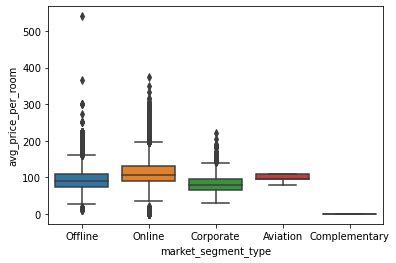

<IPython.core.display.Javascript object>

In [39]:
sns.boxplot(data=data, x="market_segment_type", y="avg_price_per_room")

## EDA

- It is a good idea to explore the data once again after manipulating it.

Let's do boxplots of all the numerical variables and barplots of all the categorical variables.

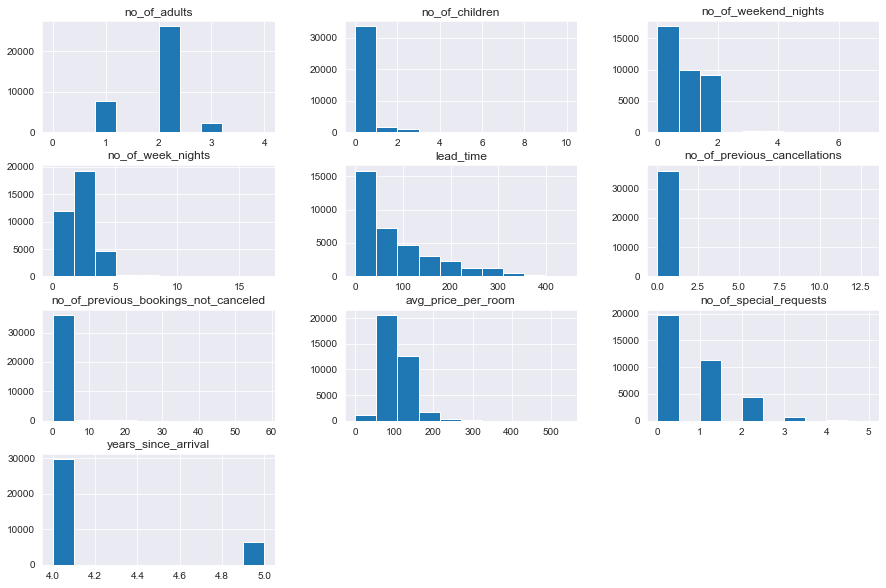

<IPython.core.display.Javascript object>

In [40]:
sns.set_style("darkgrid")
data.hist(figsize=(15, 10))
plt.show()

There are a couple variables like no_of_previous_cancellations and no_of_previous_bookings_not_canceled where it could definitely use a log transformation to make the data more normally distributed. However, given that we will be using classification modeling, we won't need to convert the data in that way.

Overall, these variables look good to me.

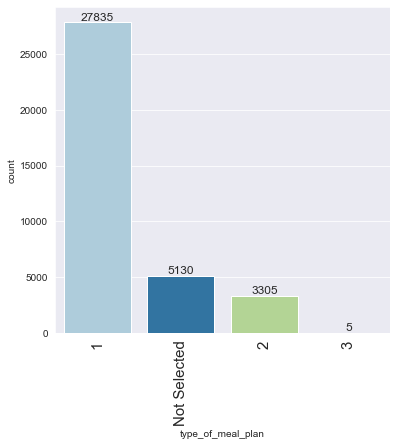

<IPython.core.display.Javascript object>

In [41]:
labeled_barplot(data, "type_of_meal_plan")

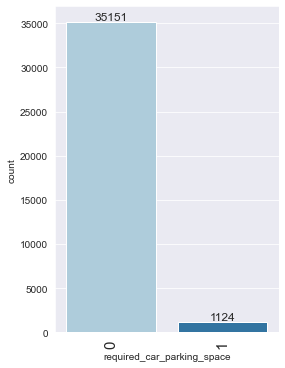

<IPython.core.display.Javascript object>

In [42]:
labeled_barplot(data, "required_car_parking_space")

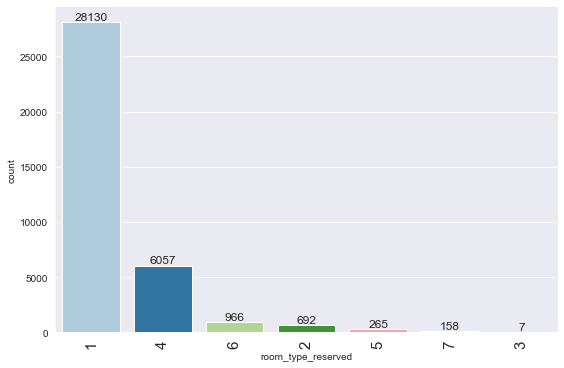

<IPython.core.display.Javascript object>

In [43]:
labeled_barplot(data, "room_type_reserved")

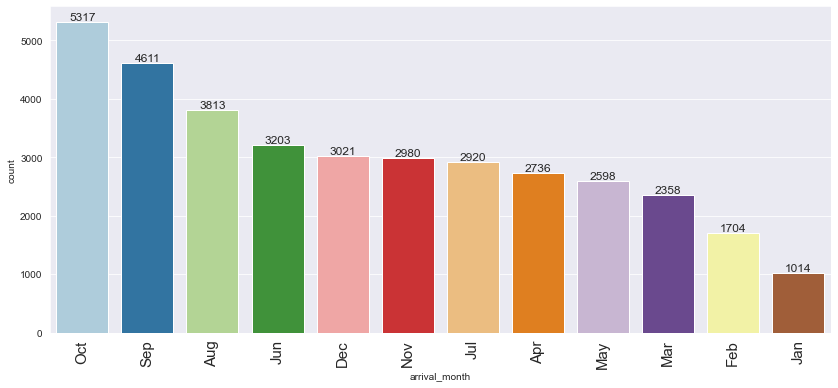

<IPython.core.display.Javascript object>

In [44]:
labeled_barplot(data, "arrival_month")

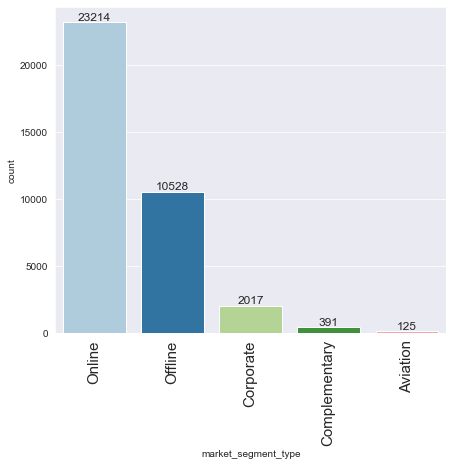

<IPython.core.display.Javascript object>

In [45]:
labeled_barplot(data, "market_segment_type")

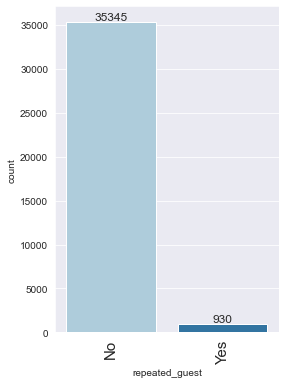

<IPython.core.display.Javascript object>

In [46]:
labeled_barplot(data, "repeated_guest")

All categorical variables look good. There aren't many choices in each variable, so I'm comfortable with one-hot encoding them.

Of course, we will not one-hot encode the booking_status column because that is the variable we are trying to predict!

In [47]:
data = pd.get_dummies(
    data,
    columns=[
        "type_of_meal_plan",
        "required_car_parking_space",
        "room_type_reserved",
        "arrival_month",
        "market_segment_type",
        "repeated_guest",
    ],
    drop_first=True,
)
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,years_since_arrival,type_of_meal_plan_2,type_of_meal_plan_3,type_of_meal_plan_Not Selected,required_car_parking_space_1,room_type_reserved_2,room_type_reserved_3,room_type_reserved_4,room_type_reserved_5,room_type_reserved_6,room_type_reserved_7,arrival_month_Aug,arrival_month_Dec,arrival_month_Feb,arrival_month_Jan,arrival_month_Jul,arrival_month_Jun,arrival_month_Mar,arrival_month_May,arrival_month_Nov,arrival_month_Oct,arrival_month_Sep,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,repeated_guest_Yes
0,2,0,1,2,224,0,0,65.00000,0,Not_Canceled,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,2,0,2,3,5,0,0,106.68000,1,Not_Canceled,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,1,0,2,1,1,0,0,60.00000,0,Canceled,4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,2,0,0,2,211,0,0,100.00000,0,Canceled,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,2,0,1,1,48,0,0,94.50000,0,Canceled,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


<IPython.core.display.Javascript object>

We will convert the booking_status column to display 1 for "Not_Canceled" and 0 for "Canceled" so that it can be used cleanly for future modeling.

In [48]:
data["booking_status"] = data["booking_status"].replace("Not_Canceled", 1)
data["booking_status"] = data["booking_status"].replace("Canceled", 0)
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,years_since_arrival,type_of_meal_plan_2,type_of_meal_plan_3,type_of_meal_plan_Not Selected,required_car_parking_space_1,room_type_reserved_2,room_type_reserved_3,room_type_reserved_4,room_type_reserved_5,room_type_reserved_6,room_type_reserved_7,arrival_month_Aug,arrival_month_Dec,arrival_month_Feb,arrival_month_Jan,arrival_month_Jul,arrival_month_Jun,arrival_month_Mar,arrival_month_May,arrival_month_Nov,arrival_month_Oct,arrival_month_Sep,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,repeated_guest_Yes
0,2,0,1,2,224,0,0,65.00000,0,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,2,0,2,3,5,0,0,106.68000,1,1,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,1,0,2,1,1,0,0,60.00000,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,2,0,0,2,211,0,0,100.00000,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,2,0,1,1,48,0,0,94.50000,0,0,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


<IPython.core.display.Javascript object>

Finally, we will split into train and test data prior to modeling.

In [49]:
# independent variables
X = data.drop(["booking_status"], axis=1)
# dependent variable
y = data[["booking_status"]]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

In [50]:
X_train.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,years_since_arrival,type_of_meal_plan_2,type_of_meal_plan_3,type_of_meal_plan_Not Selected,required_car_parking_space_1,room_type_reserved_2,room_type_reserved_3,room_type_reserved_4,room_type_reserved_5,room_type_reserved_6,room_type_reserved_7,arrival_month_Aug,arrival_month_Dec,arrival_month_Feb,arrival_month_Jan,arrival_month_Jul,arrival_month_Jun,arrival_month_Mar,arrival_month_May,arrival_month_Nov,arrival_month_Oct,arrival_month_Sep,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,repeated_guest_Yes
13662,1,0,0,1,163,0,0,115.00000,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
26641,2,0,0,3,113,0,0,78.15000,1,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
17835,2,0,2,3,359,0,0,78.00000,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
21485,2,0,0,3,136,0,0,85.50000,0,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
5670,2,0,1,2,21,0,0,151.00000,0,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


<IPython.core.display.Javascript object>

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [51]:
vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

no_of_adults                            18.85815
no_of_children                           2.14123
no_of_weekend_nights                     2.00595
no_of_week_nights                        3.78990
lead_time                                2.90407
no_of_previous_cancellations             1.41216
no_of_previous_bookings_not_canceled     1.66819
avg_price_per_room                      21.92569
no_of_special_requests                   2.02887
years_since_arrival                    118.91169
type_of_meal_plan_2                      1.38912
type_of_meal_plan_3                      1.02568
type_of_meal_plan_Not Selected           1.45713
required_car_parking_space_1             1.07888
room_type_reserved_2                     1.12477
room_type_reserved_3                     1.00391
room_type_reserved_4                     1.64304
room_type_reserved_5                     1.03598
room_type_reserved_6                     2.03921
room_type_reserved_7                     1.12353
arriva

<IPython.core.display.Javascript object>

Variables with high multicollinearity are years_since_arrival, market_segment_type variables, avg_price_per_room, and no_of_adults.

Let's start by removing years_since_arrival and measuring again.

In [52]:
X_train.drop("years_since_arrival", inplace=True, axis=1)

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

no_of_adults                           18.75919
no_of_children                          2.14089
no_of_weekend_nights                    2.00593
no_of_week_nights                       3.76738
lead_time                               2.65053
no_of_previous_cancellations            1.41185
no_of_previous_bookings_not_canceled    1.66440
avg_price_per_room                     21.50804
no_of_special_requests                  2.02135
type_of_meal_plan_2                     1.35095
type_of_meal_plan_3                     1.02568
type_of_meal_plan_Not Selected          1.43860
required_car_parking_space_1            1.07854
room_type_reserved_2                    1.12330
room_type_reserved_3                    1.00386
room_type_reserved_4                    1.64150
room_type_reserved_5                    1.03519
room_type_reserved_6                    2.03698
room_type_reserved_7                    1.12351
arrival_month_Aug                       2.43483
arrival_month_Dec         

<IPython.core.display.Javascript object>

Let's now remove market_segment_type_Online

In [53]:
X_train.drop("market_segment_type_Online", inplace=True, axis=1)

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

no_of_adults                           15.05828
no_of_children                          2.13974
no_of_weekend_nights                    1.97992
no_of_week_nights                       3.64476
lead_time                               2.57904
no_of_previous_cancellations            1.41185
no_of_previous_bookings_not_canceled    1.66426
avg_price_per_room                     15.69183
no_of_special_requests                  2.01415
type_of_meal_plan_2                     1.33857
type_of_meal_plan_3                     1.02564
type_of_meal_plan_Not Selected          1.37649
required_car_parking_space_1            1.07803
room_type_reserved_2                    1.11279
room_type_reserved_3                    1.00386
room_type_reserved_4                    1.59011
room_type_reserved_5                    1.03220
room_type_reserved_6                    1.97374
room_type_reserved_7                    1.10289
arrival_month_Aug                       2.23933
arrival_month_Dec         

<IPython.core.display.Javascript object>

Large VIFs have decreased strongly. Let's now remove avg_price_per_room

In [54]:
X_train.drop("avg_price_per_room", inplace=True, axis=1)

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

no_of_adults                           10.26111
no_of_children                          2.06570
no_of_weekend_nights                    1.97991
no_of_week_nights                       3.62105
lead_time                               2.54460
no_of_previous_cancellations            1.41185
no_of_previous_bookings_not_canceled    1.66414
no_of_special_requests                  2.00469
type_of_meal_plan_2                     1.28833
type_of_meal_plan_3                     1.02557
type_of_meal_plan_Not Selected          1.37567
required_car_parking_space_1            1.07374
room_type_reserved_2                    1.11252
room_type_reserved_3                    1.00374
room_type_reserved_4                    1.52831
room_type_reserved_5                    1.02265
room_type_reserved_6                    1.88528
room_type_reserved_7                    1.08214
arrival_month_Aug                       2.03336
arrival_month_Dec                       1.77327
arrival_month_Feb         

<IPython.core.display.Javascript object>

no_of_adults is still show high multicollinearity so we will remove that one.

In [55]:
X_train.drop("no_of_adults", inplace=True, axis=1)

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

no_of_children                         2.05965
no_of_weekend_nights                   1.93187
no_of_week_nights                      3.47189
lead_time                              2.46306
no_of_previous_cancellations           1.41047
no_of_previous_bookings_not_canceled   1.66213
no_of_special_requests                 1.89918
type_of_meal_plan_2                    1.28646
type_of_meal_plan_3                    1.02553
type_of_meal_plan_Not Selected         1.32365
required_car_parking_space_1           1.07134
room_type_reserved_2                   1.11230
room_type_reserved_3                   1.00374
room_type_reserved_4                   1.36599
room_type_reserved_5                   1.02158
room_type_reserved_6                   1.85884
room_type_reserved_7                   1.07544
arrival_month_Aug                      1.61141
arrival_month_Dec                      1.48760
arrival_month_Feb                      1.21267
arrival_month_Jan                      1.13924

<IPython.core.display.Javascript object>

All variables have a VIF value below 5, so everything has low multicollinearity.

We are ready for modeling!

## Building a Logistic Regression model

In [56]:
# We should first add a constant to the X dataframe because it will be the intercept for the logistic regression model
X_train_log1 = sm.add_constant(X_train)

<IPython.core.display.Javascript object>

In [57]:
X_train_log1.head()

,const,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,no_of_special_requests,type_of_meal_plan_2,type_of_meal_plan_3,type_of_meal_plan_Not Selected,required_car_parking_space_1,room_type_reserved_2,room_type_reserved_3,room_type_reserved_4,room_type_reserved_5,room_type_reserved_6,room_type_reserved_7,arrival_month_Aug,arrival_month_Dec,arrival_month_Feb,arrival_month_Jan,arrival_month_Jul,arrival_month_Jun,arrival_month_Mar,arrival_month_May,arrival_month_Nov,arrival_month_Oct,arrival_month_Sep,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,repeated_guest_Yes
13662,1.00000,0,0,1,163,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
26641,1.00000,0,0,3,113,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
17835,1.00000,0,2,3,359,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
21485,1.00000,0,0,3,136,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5670,1.00000,0,1,2,21,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [58]:
y_train.head()

,booking_status
13662,0
26641,1
17835,1
21485,0
5670,0


<IPython.core.display.Javascript object>

In [59]:
logit1 = sm.Logit(y_train, X_train_log1.astype(float))
lg1 = logit1.fit(
    disp=False
)  # setting disp=False will remove the information on number of iterations

print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25359
Method:                           MLE   Df Model:                           32
Date:                Fri, 03 Jun 2022   Pseudo R-squ.:                  0.3224
Time:                        20:57:31   Log-Likelihood:                -10904.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    0.8122      0.068     11.920      0.000       0.679       0.946
no_of_children                          -0.3794      

C:\Users\prani\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<IPython.core.display.Javascript object>

##### Observations:

- There are a couple variables (type_of_meal_plan_3, market_segment_type_Complementary, room_type_reserved_5, room_type_reserved_3) that have very high p-values and others (room_type_reserved_7, room_type_reserved_6, no_of_week_nights) that are high when assuming a level of significance value of 0.05. We should probably delete some of these columns.

In [60]:
# initial list of columns
cols = X_train_log1.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train_log1[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

C:\Users\prani\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


['const', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'no_of_previous_cancellations', 'no_of_special_requests', 'type_of_meal_plan_2', 'type_of_meal_plan_Not Selected', 'required_car_parking_space_1', 'room_type_reserved_2', 'room_type_reserved_4', 'arrival_month_Dec', 'arrival_month_Feb', 'arrival_month_Jan', 'arrival_month_Jun', 'arrival_month_Mar', 'arrival_month_Nov', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'repeated_guest_Yes']


<IPython.core.display.Javascript object>

The returned columns are the significant columns. This is sharing that the insignicant columns are: no_of_previous_bookings_not_canceled, type_of_meal_plan_3, room_type_reserved_3, room_type_reserved_5, room_type_reserved_6, room_type_reserved_7, arrival_month_Jul, arrival_month_May, arrival_month_Oct, arrival_month_Sep & market_segment_type_Complementary. 

These columns should be removed.

In [61]:
# creating a new training set
X_train_log2 = X_train_log1.drop(
    [
        "no_of_previous_bookings_not_canceled",
        "type_of_meal_plan_3",
        "room_type_reserved_3",
        "room_type_reserved_5",
        "room_type_reserved_6",
        "room_type_reserved_7",
        "arrival_month_Jul",
        "arrival_month_May",
        "arrival_month_Oct",
        "arrival_month_Sep",
        "market_segment_type_Complementary",
    ],
    axis=1,
)

X_train_log2.head()

,const,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,no_of_previous_cancellations,no_of_special_requests,type_of_meal_plan_2,type_of_meal_plan_Not Selected,required_car_parking_space_1,room_type_reserved_2,room_type_reserved_4,arrival_month_Aug,arrival_month_Dec,arrival_month_Feb,arrival_month_Jan,arrival_month_Jun,arrival_month_Mar,arrival_month_Nov,market_segment_type_Corporate,market_segment_type_Offline,repeated_guest_Yes
13662,1.00000,0,0,1,163,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
26641,1.00000,0,0,3,113,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
17835,1.00000,0,2,3,359,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
21485,1.00000,0,0,3,136,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
5670,1.00000,0,1,2,21,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [62]:
logit2 = sm.Logit(y_train, X_train_log2.astype(float))
lg2 = logit2.fit(
    disp=False
)  # setting disp=False will remove the information on number of iterations

print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Fri, 03 Jun 2022   Pseudo R-squ.:                  0.3188
Time:                        20:57:33   Log-Likelihood:                -10962.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.9206      0.049     18.613      0.000       0.824       1.017
no_of_children                    -0.4707      0.042    -11.223      0.

<IPython.core.display.Javascript object>

No variable has a p-value greater than 0.05, so we'll consider this to be our final logistic regression model!

Let's take a step back and interpret what these coefficients mean.

In [63]:
# converting coefficients to odds
odds = np.exp(lg2.params)

# finding the percentage change
perc_change_odds = (np.exp(lg2.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame(
    {"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train_log2.columns
).T

,const,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,no_of_previous_cancellations,no_of_special_requests,type_of_meal_plan_2,type_of_meal_plan_Not Selected,required_car_parking_space_1,room_type_reserved_2,room_type_reserved_4,arrival_month_Aug,arrival_month_Dec,arrival_month_Feb,arrival_month_Jan,arrival_month_Jun,arrival_month_Mar,arrival_month_Nov,market_segment_type_Corporate,market_segment_type_Offline,repeated_guest_Yes
Odds,2.51071,0.62454,0.92223,0.96677,0.98498,0.71926,4.13680,0.63179,0.83486,3.80422,1.92787,0.76654,1.05235,5.21350,0.80315,14.18217,0.79677,0.82085,0.80252,3.23132,8.03403,26.58825
Change_odd%,151.07053,-37.54641,-7.77668,-3.32305,-1.50169,-28.07362,313.67986,-36.82084,-16.51373,280.42222,92.78686,-23.34614,5.23493,421.35023,-19.68490,1318.21702,-20.32260,-17.91460,-19.74764,223.13175,703.40277,2558.82529


<IPython.core.display.Javascript object>

##### Coefficient Interpretations:

- Adding one child to the party will decrease the odds of no cancelation by 37.55%. This is likely because when people have kids, there is higher likelihood of a last-minute thing to come up to warrant a canceled trip.
- Adding one weekend night to the stay will decrease the odds of no cancelation by 7.78%, and adding one week night to the say will decrease the odds of no cancelation by 3.32%.
- Reserving the room one day earlier will decrease the odds of no cancelation by 1.50%. Guests that reserve closer to their time of stay would be less likely to forget they have the trip.
- Having one more prior cancelation will decrease the odds of no cancelation by 28.07%. Similarly, being a repeated guest increases the odds of no cancelation by 2558%! Loyal customers will have the least likelihood of cancelation.
- Having one more special request will increase the odds of no cancelation by 314%. This is likely because if the hotel can support more special requests, guests are more likely accept staying there because they'll have a harder time finding other hotels to meet their needs.
- Having a required car parking space will increase the odds of no cancelation by 280%. This is probably having the same behavior as a "special request" where other hotels may not be able to meet the request.
- December and January have the highest odds of no cancelation, likely because this is a holiday time for most people and they will want to travel in that time.
- Offline and Corporate market segment types have high odds of no cancelation.

## Model performance evaluation

First, let's create functions to calculate different metrics and confusion matrices.

In [64]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [65]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

Let's observe how strong this model is with our training set.

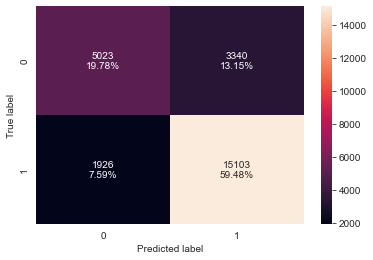

<IPython.core.display.Javascript object>

In [66]:
confusion_matrix_statsmodels(lg2, X_train_log2, y_train)

In [67]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg2, X_train_log2, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79261,0.88690,0.81890,0.85154


<IPython.core.display.Javascript object>

Let's take a step back and think about what we want to prioritize here:

A false positive means that we incorrectly anticipate someone to keep their hotel booking. This would result in a cancelation, and introduces the challenge of trying to handle the cancelation and experiencing losses.
A false negative means that we incorrectly anticipate someone to cancel their hotel booking. This means we could be losing a valuable customer.

Given that this problem statement was posed because we want to prevent cancelations, we want to prevent false positives. That means we want to prioritize a high precision value.

Our current logistic regression model has a precision of 82%. This is fine, but let's see if we can do better.

We'll start by plotting a ROC-AUC curve. The optimal threshold, in theory, is the one where the difference between the true positive rate and the false positive rate is the highest.

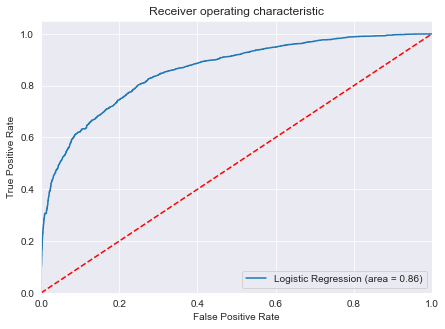

<IPython.core.display.Javascript object>

In [68]:
logit_roc_auc_train = roc_auc_score(y_train, lg2.predict(X_train_log2))
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train_log2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [69]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.6365906271814157


<IPython.core.display.Javascript object>

Calculate the metrics again with this threshold

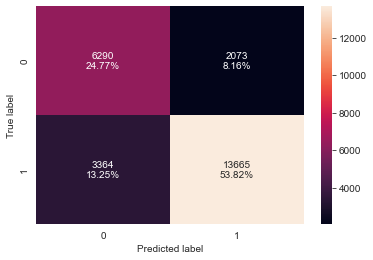

<IPython.core.display.Javascript object>

In [70]:
confusion_matrix_statsmodels(
    lg2, X_train_log2, y_train, threshold=optimal_threshold_auc_roc
)

In [71]:
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_train_log2, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.78588,0.80245,0.86828,0.83407


<IPython.core.display.Javascript object>

Precision increased by about 5% after using the optimal threshold.

Let's see if we can find a better threshold from plotting the precision-recall curve.

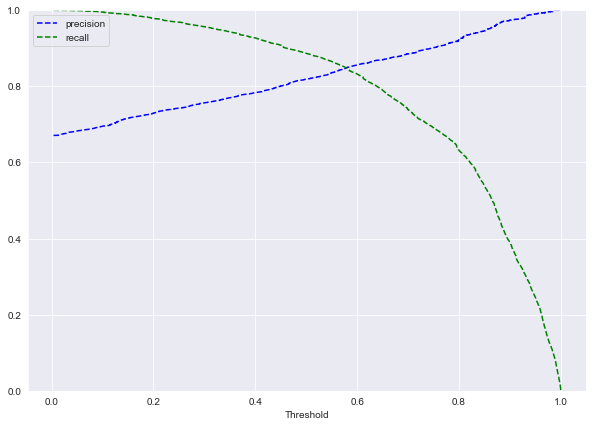

<IPython.core.display.Javascript object>

In [72]:
y_scores = lg2.predict(X_train_log2)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

A threshold value of about 0.58 should get us the best balance between precision and recall.

In [73]:
optimal_threshold_curve = 0.58

<IPython.core.display.Javascript object>

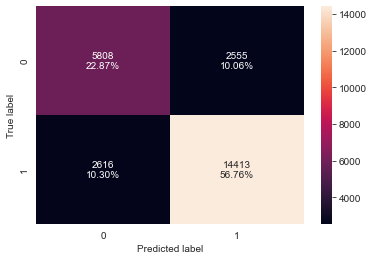

<IPython.core.display.Javascript object>

In [74]:
confusion_matrix_statsmodels(
    lg2, X_train_log2, y_train, threshold=optimal_threshold_curve
)

In [75]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_train_log2, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79635,0.84638,0.84942,0.84790


<IPython.core.display.Javascript object>

Precision is about 1% down, but recall went up 4% as a result of this threshold update.

In [76]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression statsmodel",
    "Logistic Regression-0.64 Threshold",
    "Logistic Regression-0.58 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression statsmodel,Logistic Regression-0.64 Threshold,Logistic Regression-0.58 Threshold
Accuracy,0.79261,0.78588,0.79635
Recall,0.88690,0.80245,0.84638
Precision,0.81890,0.86828,0.84942
F1,0.85154,0.83407,0.84790


<IPython.core.display.Javascript object>

### Test set performance check

First, make the test set match the format we have for the train set.

In [77]:
X_test_log = sm.add_constant(X_test)
X_test_log = X_test_log[X_train_log2.columns].astype(float)
X_test_log.head()

,const,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,no_of_previous_cancellations,no_of_special_requests,type_of_meal_plan_2,type_of_meal_plan_Not Selected,required_car_parking_space_1,room_type_reserved_2,room_type_reserved_4,arrival_month_Aug,arrival_month_Dec,arrival_month_Feb,arrival_month_Jan,arrival_month_Jun,arrival_month_Mar,arrival_month_Nov,market_segment_type_Corporate,market_segment_type_Offline,repeated_guest_Yes
30392,1.00000,0.00000,1.00000,0.00000,53.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
6685,1.00000,0.00000,1.00000,2.00000,63.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
8369,1.00000,0.00000,2.00000,3.00000,55.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2055,1.00000,0.00000,0.00000,2.00000,53.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
10969,1.00000,0.00000,2.00000,4.00000,245.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000


<IPython.core.display.Javascript object>

Use the model with the default threshold on the test set

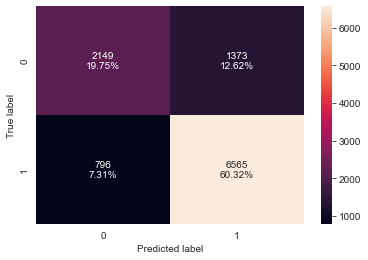

<IPython.core.display.Javascript object>

In [78]:
confusion_matrix_statsmodels(lg2, X_test_log, y_test)

In [79]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg2, X_test_log, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80070,0.89186,0.82703,0.85823


<IPython.core.display.Javascript object>

ROC-AUC curve on test set

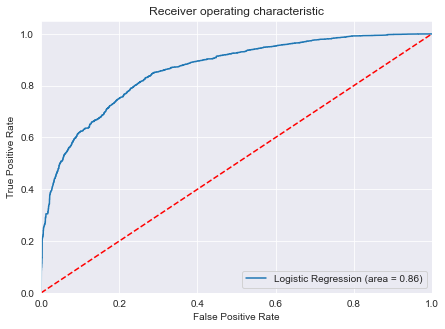

<IPython.core.display.Javascript object>

In [80]:
logit_roc_auc_train = roc_auc_score(y_test, lg2.predict(X_test_log))
fpr, tpr, thresholds = roc_curve(y_test, lg2.predict(X_test_log))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

Use the model with the optimal threshold from the ROC-AUC curve

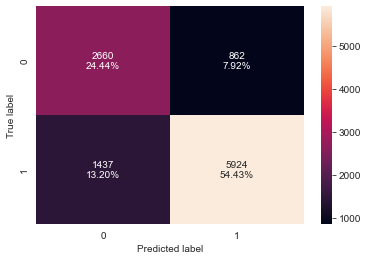

<IPython.core.display.Javascript object>

In [81]:
confusion_matrix_statsmodels(
    lg2, X_test_log, y_test, threshold=optimal_threshold_auc_roc
)

In [82]:
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_test_log, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.78875,0.80478,0.87297,0.83749


<IPython.core.display.Javascript object>

Use the model with the optimal threshold from the precision-recall curve

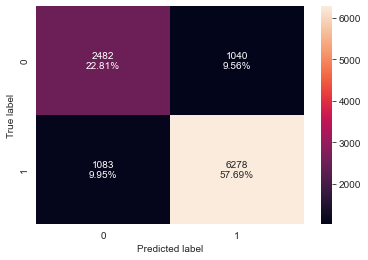

<IPython.core.display.Javascript object>

In [83]:
confusion_matrix_statsmodels(lg2, X_test_log, y_test, threshold=optimal_threshold_curve)

In [84]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_test_log, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80493,0.85287,0.85788,0.85537


<IPython.core.display.Javascript object>

In [85]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression statsmodel",
    "Logistic Regression-0.64 Threshold",
    "Logistic Regression-0.58 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression statsmodel,Logistic Regression-0.64 Threshold,Logistic Regression-0.58 Threshold
Accuracy,0.80070,0.78875,0.80493
Recall,0.89186,0.80478,0.85287
Precision,0.82703,0.87297,0.85788
F1,0.85823,0.83749,0.85537


<IPython.core.display.Javascript object>

## Final Model Summary

- All the models gave a generalized performance on the training and testing set.
- The initial statsmodel was strong in recall but had the lowest precision.
- A threshold value of 0.58 provided us with a good balance between precision and recall with both at about 85%.
- A threshold value of 0.64 provided us with a precision of 87% for both the train set and the test set. This would be the best logistic regression model to recommend for addressing the problem to prevent cancelations.

## Building a Decision Tree model

Let's start by making a decision tree model without any pruning.

In [86]:
dTree = DecisionTreeClassifier(criterion="gini", random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

Let's compare how this model performs with the training set and testing set.

In [87]:
# convert X_test into columns that X_train has
X_test = X_test[X_train.columns].astype(float)
X_test.head()

,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,no_of_special_requests,type_of_meal_plan_2,type_of_meal_plan_3,type_of_meal_plan_Not Selected,required_car_parking_space_1,room_type_reserved_2,room_type_reserved_3,room_type_reserved_4,room_type_reserved_5,room_type_reserved_6,room_type_reserved_7,arrival_month_Aug,arrival_month_Dec,arrival_month_Feb,arrival_month_Jan,arrival_month_Jul,arrival_month_Jun,arrival_month_Mar,arrival_month_May,arrival_month_Nov,arrival_month_Oct,arrival_month_Sep,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,repeated_guest_Yes
30392,0.00000,1.00000,0.00000,53.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
6685,0.00000,1.00000,2.00000,63.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
8369,0.00000,2.00000,3.00000,55.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
2055,0.00000,0.00000,2.00000,53.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
10969,0.00000,2.00000,4.00000,245.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000


<IPython.core.display.Javascript object>

In [88]:
decision_tree_initial_train = model_performance_classification_statsmodels(
    dTree, X_train, y_train
)
decision_tree_initial_train

,Accuracy,Recall,Precision,F1
0,0.97928,0.98338,0.98570,0.98454


<IPython.core.display.Javascript object>

In [89]:
decision_tree_initial_test = model_performance_classification_statsmodels(
    dTree, X_test, y_test
)
decision_tree_initial_test

,Accuracy,Recall,Precision,F1
0,0.84508,0.87678,0.89230,0.88447


<IPython.core.display.Javascript object>

Given that we determined earlier that precision is important for this request, let's calculate precision.

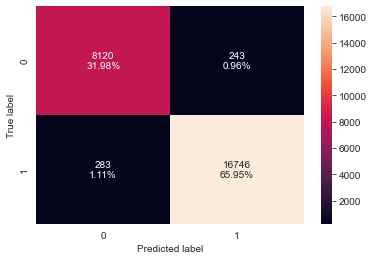

<IPython.core.display.Javascript object>

In [90]:
confusion_matrix_statsmodels(dTree, X_train, y_train)

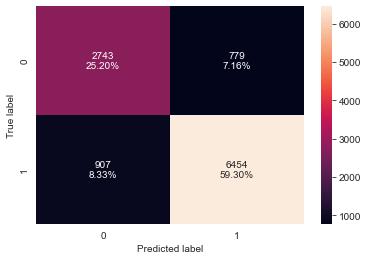

<IPython.core.display.Javascript object>

In [91]:
confusion_matrix_statsmodels(dTree, X_test, y_test)

Let's visualize what this decision tree model looks like.

In [92]:
# feature_names = list(X_train.columns)
# plt.figure(figsize=(20, 30))
# tree.plot_tree(
#    dTree,
#    feature_names=feature_names,
#    filled=True,
#    fontsize=9,
#    node_ids=True,
#    class_names=True,
# )
# plt.show()

<IPython.core.display.Javascript object>

The decision tree model was so complicated, that the system couldn't visualize it with the above code! It has been commented to prevent the notebook from attempting to run the code.

Instead, we will only print out the model below.

In [93]:
print(tree.export_text(dTree, feature_names=list(X_train.columns), show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |--- lead_time <= 20.50
|   |   |   |   |--- lead_time <= 9.50
|   |   |   |   |   |--- no_of_week_nights <= 3.50
|   |   |   |   |   |   |--- repeated_guest_Yes <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 3.50
|   |   |   |   |   |   |   |   |--- arrival_month_Feb <= 0.50
|   |   |   |   |   |   |   |   |   |--- arrival_month_Jan <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- arrival_month_Dec <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 24
|   |   |   |   |   |   |   |   |   |   |--- arrival_month_Dec >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 59.00] class: 1
|   |   |   |   |   |   |   |   |   |--- arrival_month_Jan >  0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 79.00] class: 1
|   |   |   |   |   |   |   |   |--- arrival_month_Feb >  0.50
|   |   |   |  

<IPython.core.display.Javascript object>

Let's see how importance of features are in this decision tree model.

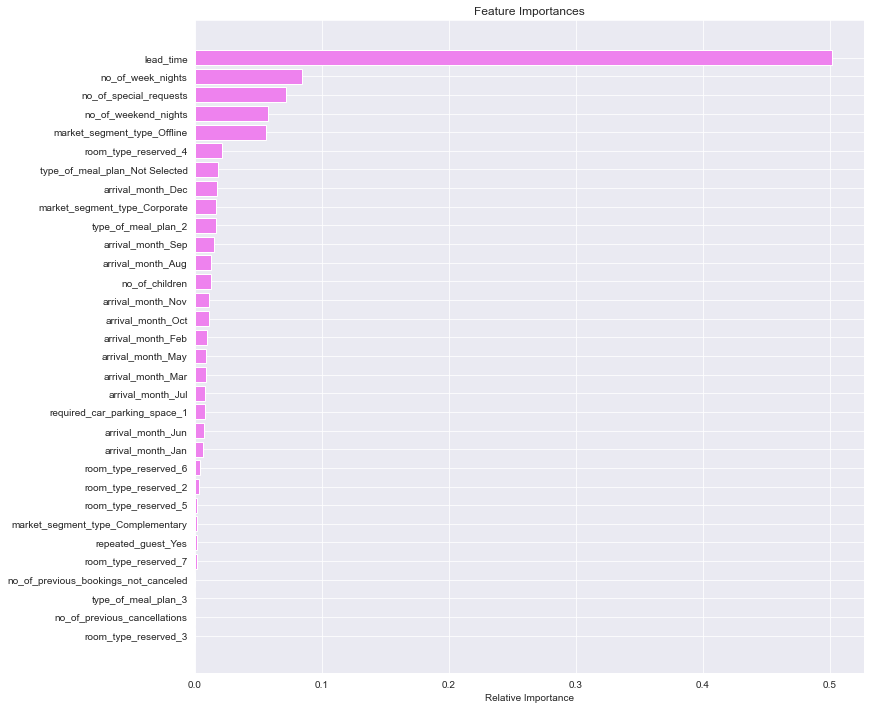

<IPython.core.display.Javascript object>

In [94]:
feature_names = list(X_train.columns)
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

lead_time has the strongest importance. no_of_week_nights, no_of_special_requests, no_of_weekend_nights, and market_segment_type_Offline have some importance.

## Do we need to prune the tree?

We actually have a small number of false positives and false negatives in both the training set and test set. But, we should still definitely prune the tree for the following reasons:
- The accuracy and precision for the model is very high for the training data but not as high for the test data
- The decision tree model currently is very complex with the high number of nodes and depth that it has. It is likely overfitting the training data.

We will use prepruning via GridSearch. We will tune hyperparameters, looping through to find the model with the best fit with certain values. 

In [95]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(1, 8),
    "criterion": ["entropy", "gini"],
    "max_leaf_nodes": [5, 10, 15, 20, 25, 30],
    "min_impurity_decrease": [0.001, 0.01, 0.1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.precision_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, max_leaf_nodes=30,
                       min_impurity_decrease=0.001, random_state=1)

<IPython.core.display.Javascript object>

In [96]:
decision_tree_tune_perf_train = model_performance_classification_statsmodels(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.81998,0.84515,0.88154,0.86296


<IPython.core.display.Javascript object>

In [97]:
decision_tree_tune_perf_test = model_performance_classification_statsmodels(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.82101,0.84540,0.88483,0.86467


<IPython.core.display.Javascript object>

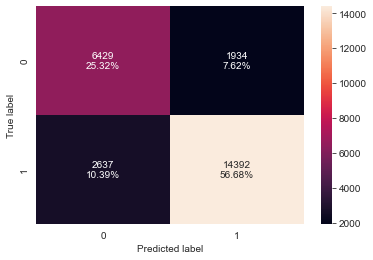

<IPython.core.display.Javascript object>

In [98]:
confusion_matrix_statsmodels(estimator, X_train, y_train)

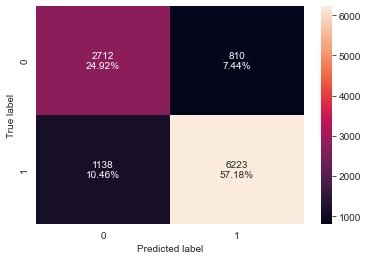

<IPython.core.display.Javascript object>

In [99]:
confusion_matrix_statsmodels(estimator, X_test, y_test)

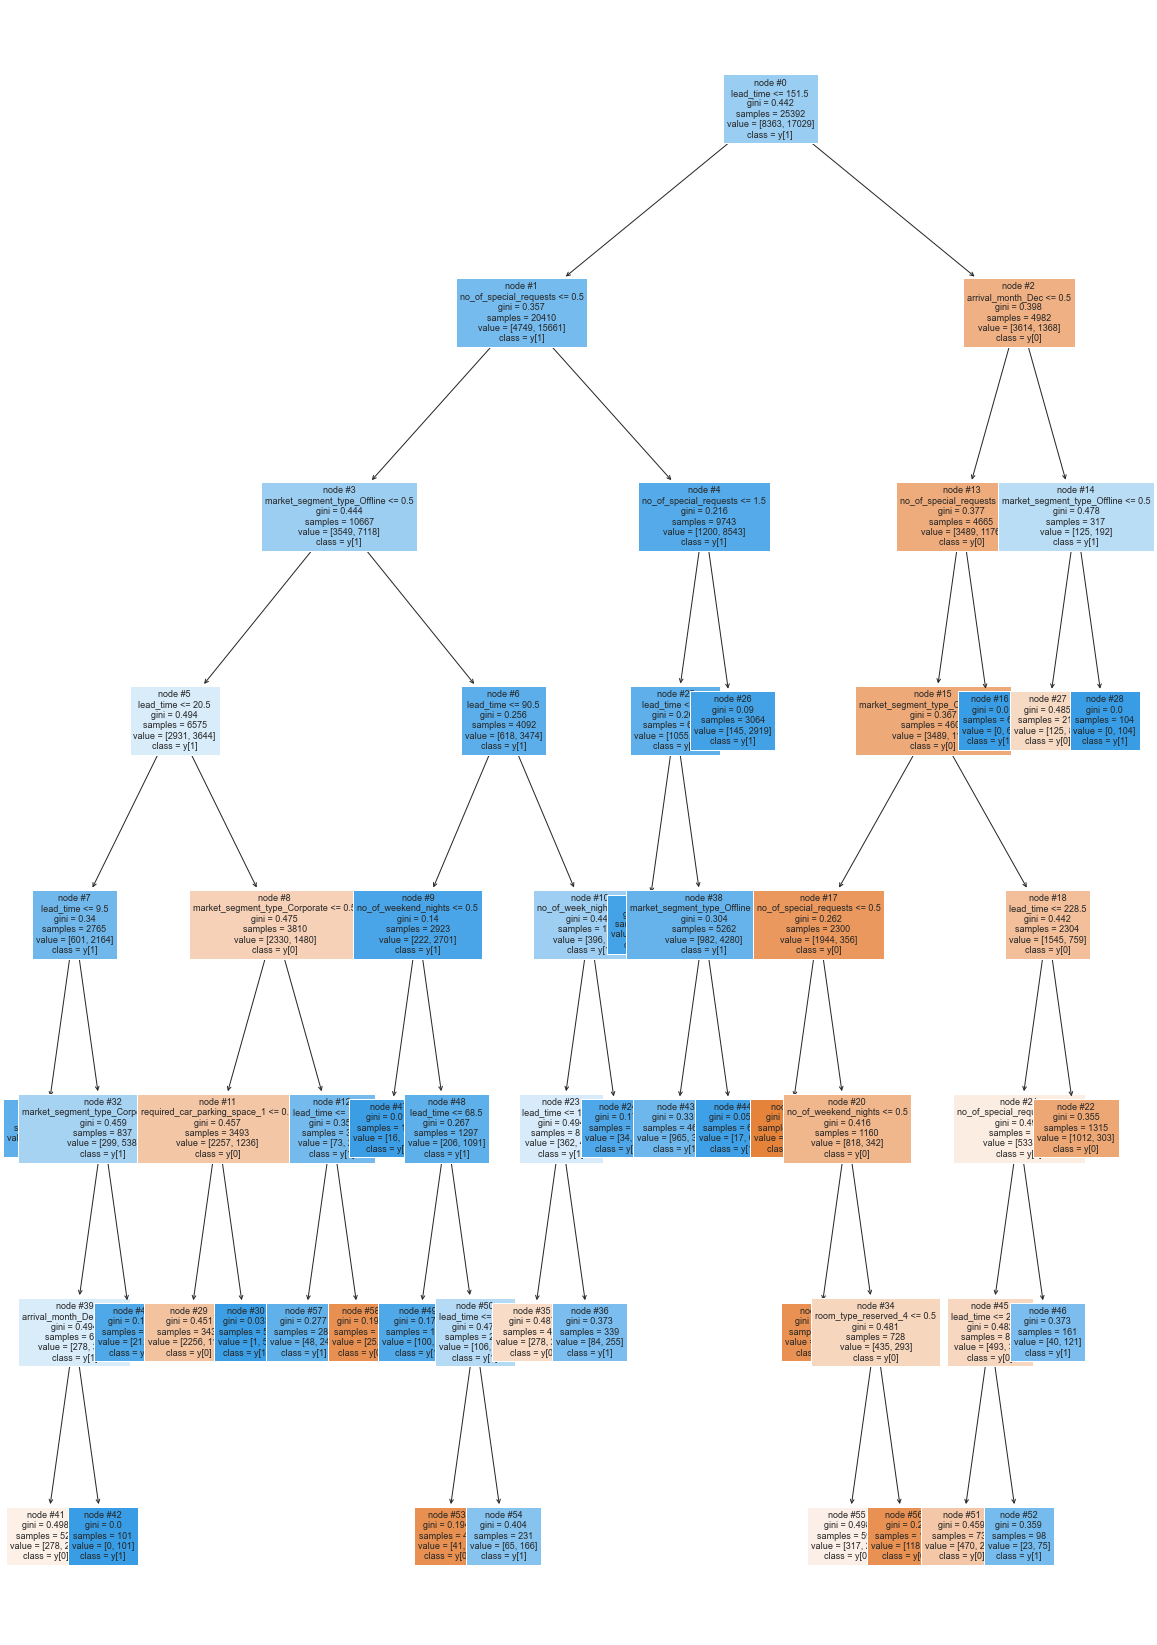

<IPython.core.display.Javascript object>

In [100]:
feature_names = list(X_train.columns)
plt.figure(figsize=(20, 30))
tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

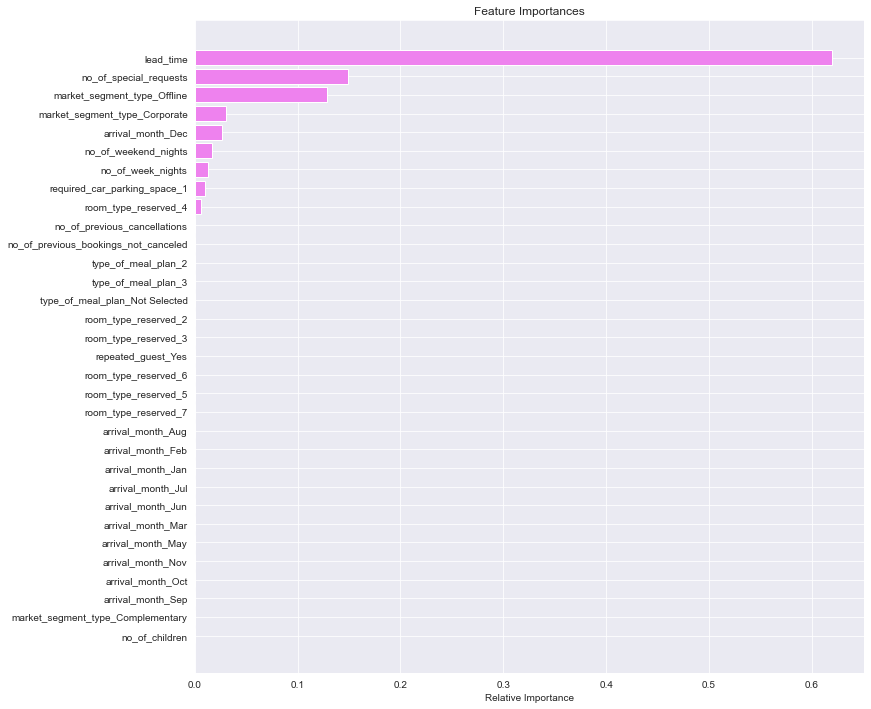

<IPython.core.display.Javascript object>

In [101]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

The prepruned model is much simpler, it is able to get outputted visually.

The prepruned model also holds lead_time with a high importance, and no_of_special_requests and market_segment_type_Offline with moderate importance. market_segment_type_Corporate does not have as high importance.

#### Cost Complexity Pruning

Another way to prune is through cost complexity - this provides the ability to see a correlation between the cost complexity parameter and validation scores.

In [102]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

<IPython.core.display.Javascript object>

In [103]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.02569
1,0.00000,0.02569
2,0.00000,0.02569
3,0.00000,0.02569
4,0.00000,0.02569
...,...,...
1779,0.00301,0.30220
1780,0.00396,0.30616
1781,0.00454,0.31070
1782,0.01816,0.36518


<IPython.core.display.Javascript object>

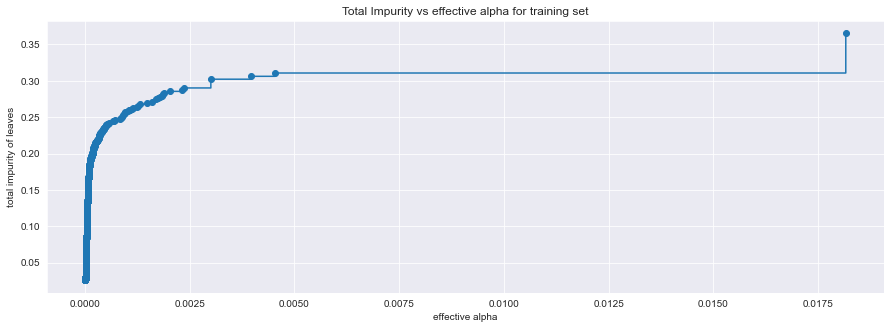

<IPython.core.display.Javascript object>

In [104]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Let's train a decision tree using the effective alphas.

In [105]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.07657789477371368


<IPython.core.display.Javascript object>

Then, we'll plot the number of nodes and depth against alpha.

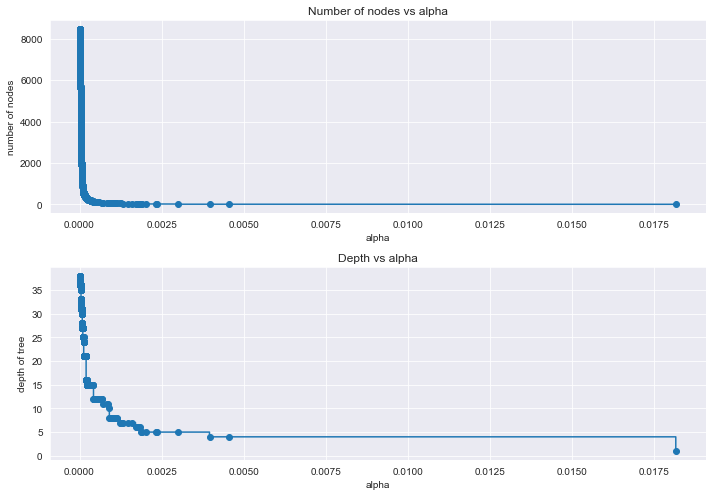

<IPython.core.display.Javascript object>

In [106]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

Now, let's plot precision vs. alpha for our training and testing sets.

In [107]:
precision_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = metrics.precision_score(y_train, pred_train)
    precision_train.append(values_train)

<IPython.core.display.Javascript object>

In [108]:
precision_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = metrics.precision_score(y_test, pred_test)
    precision_test.append(values_test)

<IPython.core.display.Javascript object>

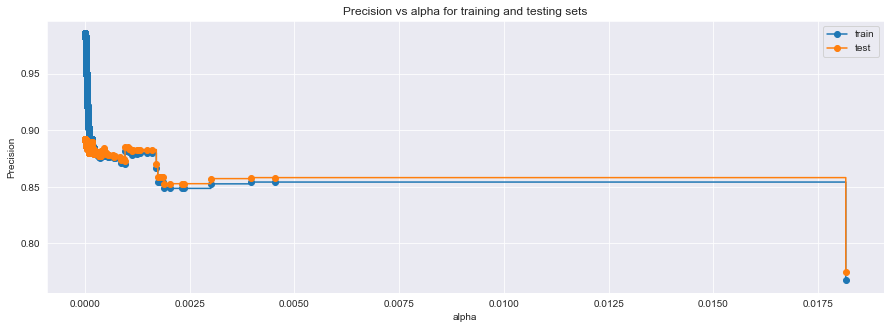

<IPython.core.display.Javascript object>

In [109]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Precision")
ax.set_title("Precision vs alpha for training and testing sets")
ax.plot(ccp_alphas, precision_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, precision_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

Looking at the graph - let's avoid early values in the test set because that can be prone to overfitting. I will instead work backwards and pick one of the values in the ~0.88 range there.

In [110]:
precision_test[1750:1784]

[0.8779188857025809,
 0.8767888782881287,
 0.8775956284153006,
 0.8760724499523356,
 0.8737785016286646,
 0.87443578169881,
 0.8748623348017621,
 0.8748623348017621,
 0.8729744575666026,
 0.8850900836998156,
 0.8850900836998156,
 0.8833687190375088,
 0.8833687190375088,
 0.8816551334557265,
 0.8824698367636622,
 0.882202304737516,
 0.8829710666474737,
 0.8829710666474737,
 0.8829710666474737,
 0.8829710666474737,
 0.8700195040401226,
 0.8590613130765057,
 0.8590613130765057,
 0.8590613130765057,
 0.8585432266848196,
 0.8528347406513872,
 0.8528347406513872,
 0.8528347406513872,
 0.8528347406513872,
 0.8573194177423785,
 0.8582026875699889,
 0.8582026875699889,
 0.7743489732706206]

<IPython.core.display.Javascript object>

Position 1759 seems to generally have the highest precision score with ~0.885. 

Let's find the best model where we get the highest train and test precision.

In [111]:
best_model = clfs[1759]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0009591289256723479, random_state=1)


<IPython.core.display.Javascript object>

In [112]:
decision_tree_postpruned_perf_train = model_performance_classification_statsmodels(
    best_model, X_train, y_train
)
decision_tree_postpruned_perf_train

,Accuracy,Recall,Precision,F1
0,0.82195,0.84808,0.88190,0.86466


<IPython.core.display.Javascript object>

In [113]:
decision_tree_postpruned_perf_test = model_performance_classification_statsmodels(
    best_model, X_test, y_test
)
decision_tree_postpruned_perf_test

,Accuracy,Recall,Precision,F1
0,0.82248,0.84758,0.88509,0.86593


<IPython.core.display.Javascript object>

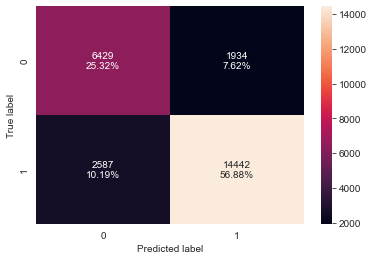

<IPython.core.display.Javascript object>

In [114]:
confusion_matrix_statsmodels(best_model, X_train, y_train)

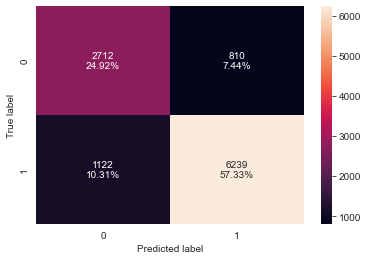

<IPython.core.display.Javascript object>

In [115]:
confusion_matrix_statsmodels(best_model, X_test, y_test)

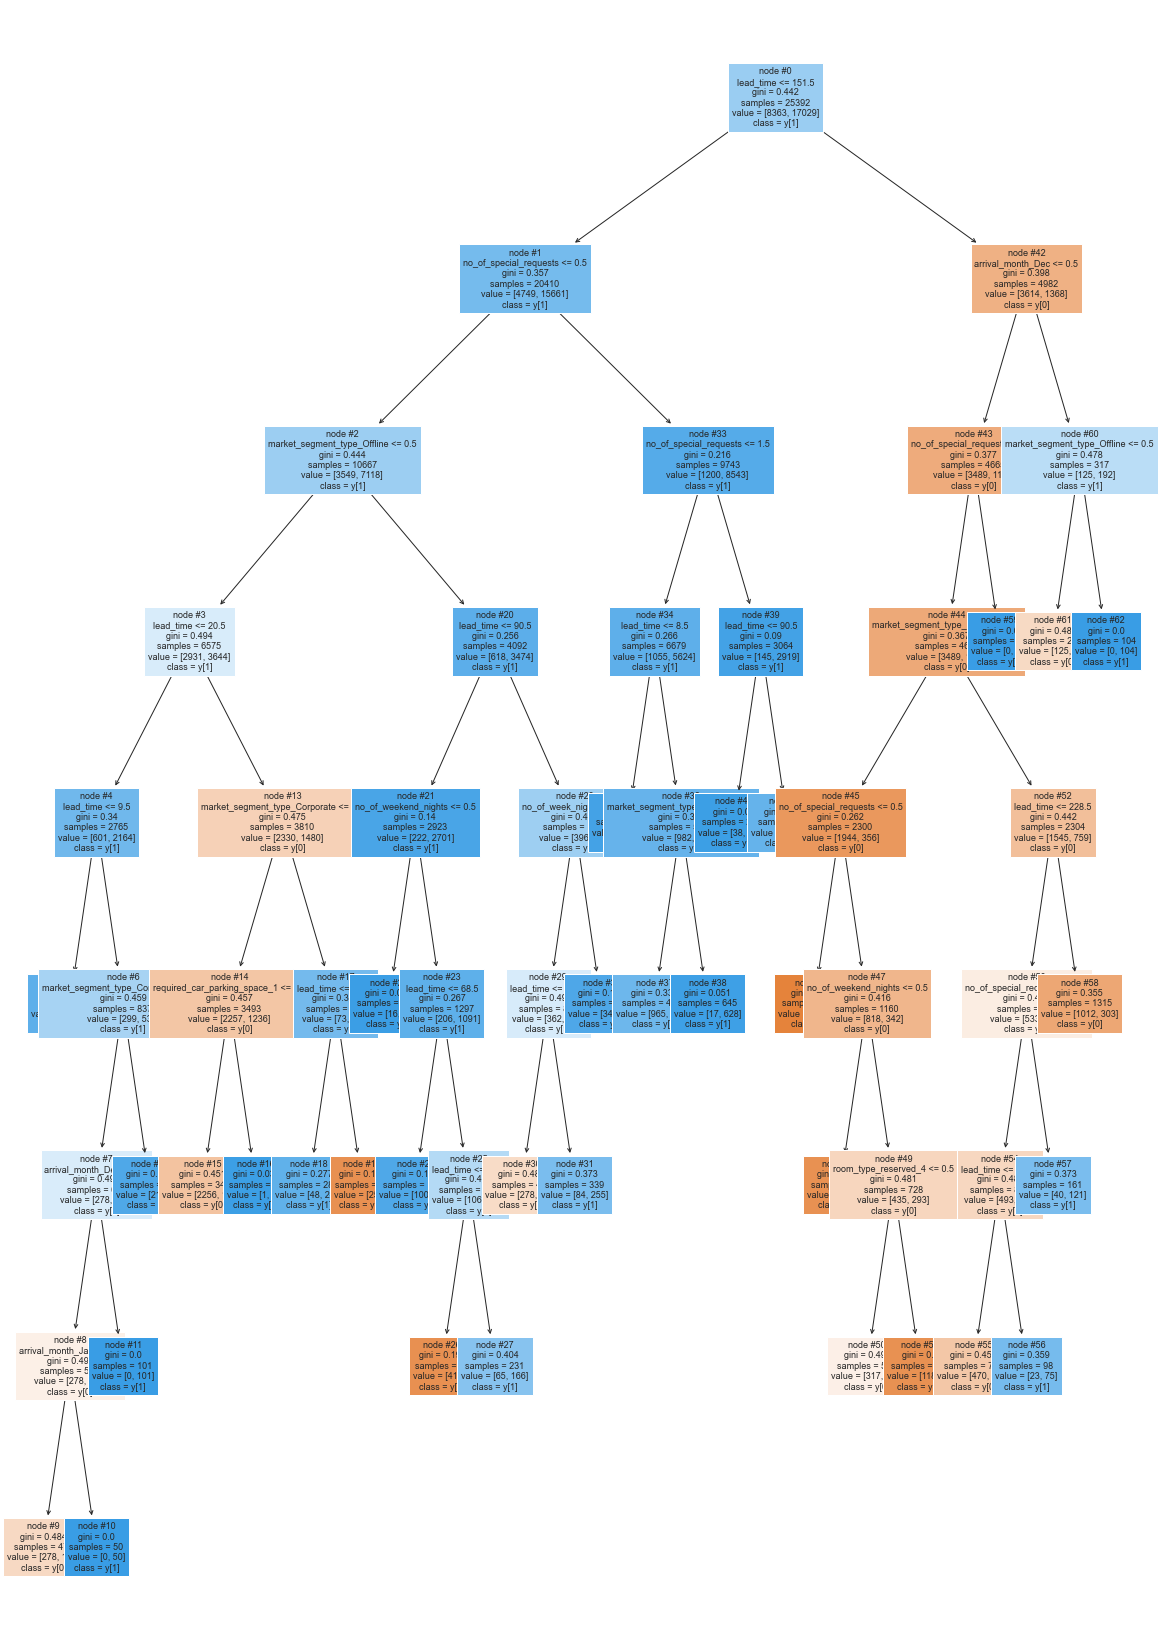

<IPython.core.display.Javascript object>

In [116]:
feature_names = list(X_train.columns)
plt.figure(figsize=(20, 30))
tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

In [117]:
print(
    tree.export_text(best_model, feature_names=list(X_train.columns), show_weights=True)
)

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |--- lead_time <= 20.50
|   |   |   |   |--- lead_time <= 9.50
|   |   |   |   |   |--- weights: [302.00, 1626.00] class: 1
|   |   |   |   |--- lead_time >  9.50
|   |   |   |   |   |--- market_segment_type_Corporate <= 0.50
|   |   |   |   |   |   |--- arrival_month_Dec <= 0.50
|   |   |   |   |   |   |   |--- arrival_month_Jan <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [278.00, 194.00] class: 0
|   |   |   |   |   |   |   |--- arrival_month_Jan >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 50.00] class: 1
|   |   |   |   |   |   |--- arrival_month_Dec >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 101.00] class: 1
|   |   |   |   |   |--- market_segment_type_Corporate >  0.50
|   |   |   |   |   |   |--- weights: [21.00, 193.00] class: 1
|   |   |   |--- lead_time >  20.50
|   |   |   |   |--- market_segment_type_Corporate 

<IPython.core.display.Javascript object>

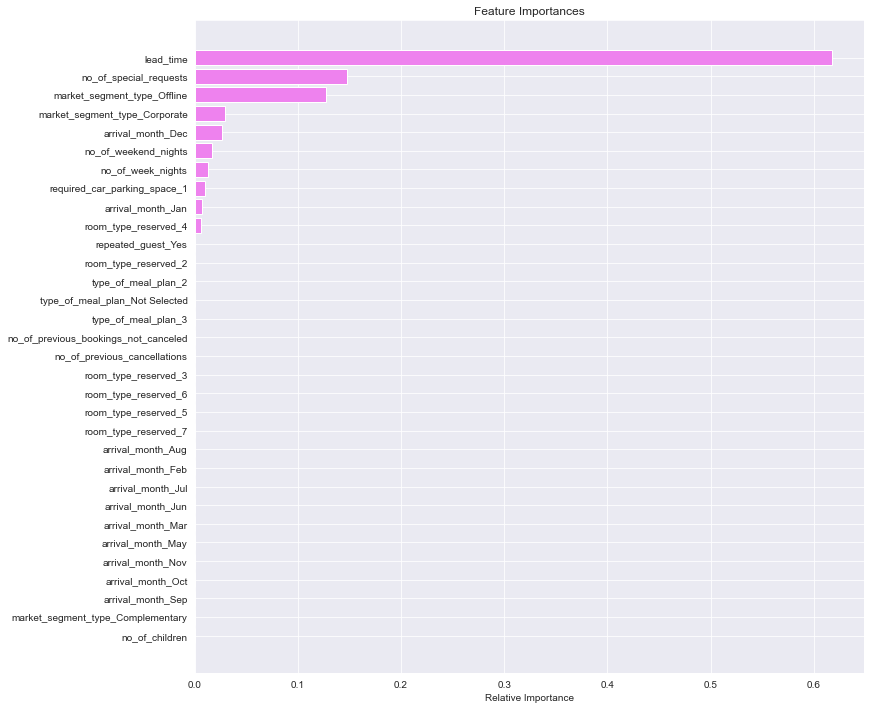

<IPython.core.display.Javascript object>

In [118]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

The postpruned model is also much simpler than the initial decision tree model. 

The postpruned model holds similar importances as the prepruned model.

The postpruned model holds about an 88% precision in both the training data and testing data.

#### Comparing Decision Tree Models

In [119]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_initial_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.97928,0.81998,0.82195
Recall,0.98338,0.84515,0.84808
Precision,0.98570,0.88154,0.88190
F1,0.98454,0.86296,0.86466


<IPython.core.display.Javascript object>

In [120]:
# test performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_initial_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.84508,0.82101,0.82248
Recall,0.87678,0.84540,0.84758
Precision,0.89230,0.88483,0.88509
F1,0.88447,0.86467,0.86593


<IPython.core.display.Javascript object>

#### Decision Tree Model Conclusions:

We will ignore the initial decision tree model because it overfits the training data. The prepruned and postpruned trees are very comparable as both have precision values of 88%. Reviewing the other metrics, the F1 score is the most consistent amongst the train and test data for the postpruned tree. We'll consider the postpruned tree as the best decision tree model to use for the data.

##### Observations:
- The lead_time is the most valuable variable that contributes to predicting if a hotel stay will be canceled.
- no_of_special_requests, market_segment_type_Offline, and market_segment_type_Corporate have moderate importance.

## Model Performance Comparison and Conclusions

Let's compare the best logistic regression model to the best decision tree model.

In [121]:
# test performance comparison

models_comp_df = pd.concat(
    [
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        decision_tree_postpruned_perf_train.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_comp_df.columns = [
    "Logistic Regression-0.64 Threshold Train",
    "Logistic Regression-0.64 Threshold Test",
    "Decision Tree (Post-Pruning) Train",
    "Decision Tree (Post-Pruning) Test",
]
print("Performance comparison:")
models_comp_df

Performance comparison:


,Logistic Regression-0.64 Threshold Train,Logistic Regression-0.64 Threshold Test,Decision Tree (Post-Pruning) Train,Decision Tree (Post-Pruning) Test
Accuracy,0.78588,0.78875,0.82195,0.82248
Recall,0.80245,0.80478,0.84808,0.84758
Precision,0.86828,0.87297,0.88190,0.88509
F1,0.83407,0.83749,0.86466,0.86593


<IPython.core.display.Javascript object>

The postpruned decision tree is the best model, with a precision of 88% that is consistent for both the train and test data.

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

- Lead time is a strong indicator of whether or not a cancelation is likely to happen. Bookings made within 151 days have a higher likelihood to stay. I would recommend that the hotel sends a reminder email to customers when they are within 150 days of the actual stay to confirm if they will actually stay. If they cancel, the hotel will have a long time to find a replacement for the stay.
- Reservations in December have a high likelihood of staying. The hotel does not need to devote as many resources to potential cancelations in December. The staff could use that time for other things like enhancements to the hotel, time to onboard new staff, extra time off for the staff.
- Generally, guests with more special requests are less likely to cancel. It would be valuable for the hotel to invest resources into catering more special requests so that they can guarantee guests that will keep their booking and reduce the amount of competition. 
- Offline market segment types are more likely to keep their bookings. The hotel can focus more on bookings through offline market segments to reduce cancelation probabilities.

- For future modeling, it would be interesting to explore the arrival_day column to see if that variable has an influence despite our initial assumption.